In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("./housing.csv")
df.shape

(507, 14)

In [36]:
##CHECKING THE COLUMNS NAMES
col = df.columns
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [37]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [38]:
##CHECKING MISSING VALUES
df.isna().sum()

CRIM        0
ZN          2
INDUS       0
CHAS        0
NOX         1
RM          1
AGE         0
DIS         2
RAD         0
TAX         0
PTRATIO     1
B           1
LSTAT       0
MEDV       55
dtype: int64

# EDA

<AxesSubplot:>

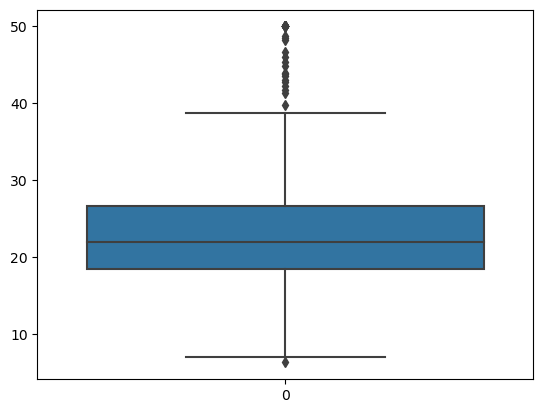

In [3]:
# Box Plot
import seaborn as sns
sns.boxplot(df['MEDV'])

/tmp/ipykernel_24047/4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/tmp/ipykernel_24047/4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/tmp/ipykernel_24047/4050624376.py:5: UserWarning: 

`distplot` is a deprecated function and

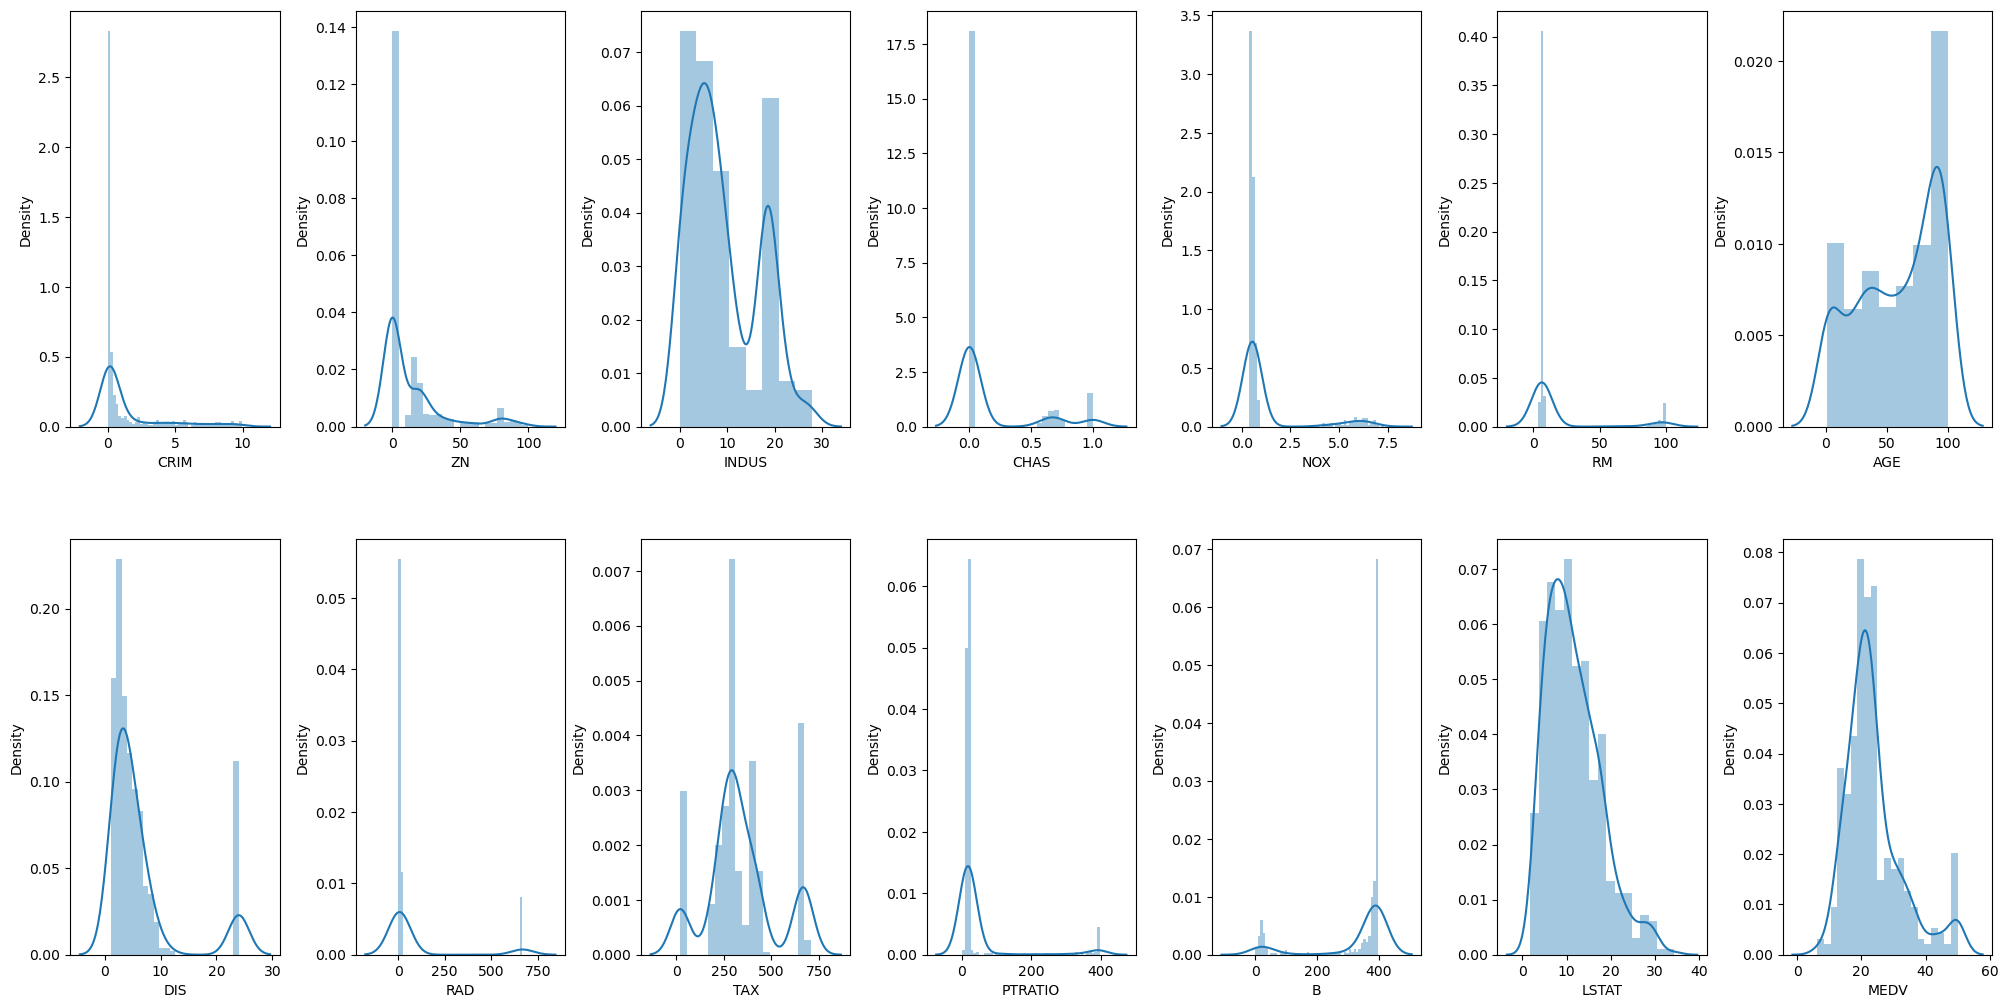

In [4]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

/tmp/ipykernel_24047/3054645739.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(v), ax=axs[index])
/tmp/ipykernel_24047/3054645739.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(v), ax=axs[index])
/tmp/ipykernel_24047/3054645739.py:5: UserWarning: 

`distplot` is a dep

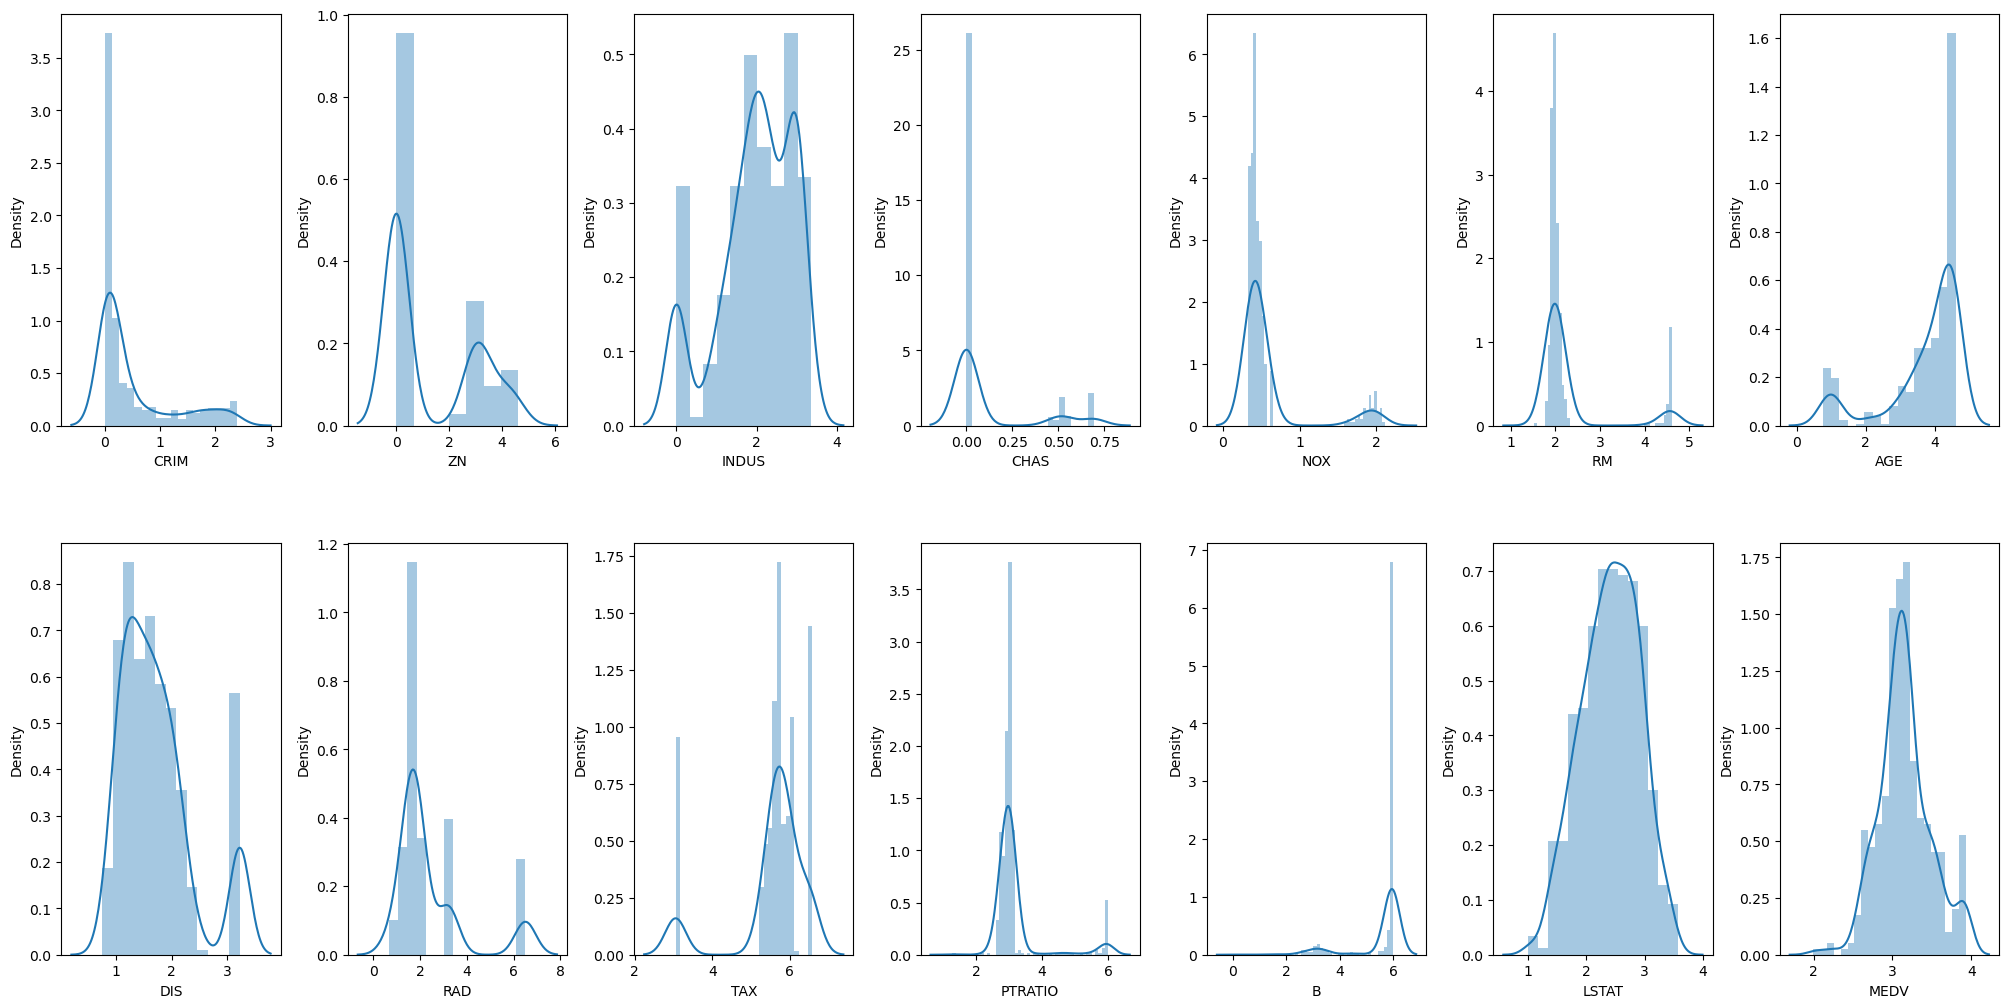

In [5]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(np.log1p(v), ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [6]:
for col in df.columns:
    df[col] = np.log1p(df[col])

In [14]:
# Function for taking the intersection between two sets
def intersection(lst1, lst2):
    
    lst1 = list(lst1)
    lst2 = list(lst2)
    
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

# Splitting the data

In [15]:
# Split the dataset into train, and testSet
trainSet, testSet = train_test_split(df, test_size = 0.30, random_state = 8)

valSet, testSet = train_test_split(testSet, test_size=0.50, random_state = 8)

indexesWithMissingRows = np.argwhere(df.isna().sum(1).to_numpy() >= 5).reshape(-1)

missingIndexesInTrainSet = intersection(indexesWithMissingRows, trainSet.index)
missingIndexesInValSet = intersection(indexesWithMissingRows, valSet.index)
missingIndexesInTestSet = intersection(indexesWithMissingRows, testSet.index)

if (len(missingIndexesInTrainSet) > 0):
    trainSet = trainSet.drop(missingIndexesInTrainSet)

if (len(missingIndexesInValSet) > 0):
    valSet = testSet.drop(missingIndexesInValSet)
    
if (len(missingIndexesInTestSet) > 0):
    testSet = testSet.drop(missingIndexesInTestSet)

In [16]:
##CHECKING MISSING VALUES
trainSet.isna().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         1
RAD         0
TAX         0
PTRATIO     0
B           1
LSTAT       0
MEDV       38
dtype: int64

In [17]:
trainSet.dropna(subset = ['MEDV'], inplace = True)
testSet.dropna(subset = ['MEDV'], inplace = True)
valSet.dropna(subset = ['MEDV'], inplace = True)

# Scaling the data

In [18]:
# Normalizing the data
scaler = MinMaxScaler()
cols = trainSet.select_dtypes([float, int]).columns.to_list()

actualTestSet = testSet.copy(deep = True)

trainSetY = trainSet['MEDV']
testSetY = testSet['MEDV']

trainSet = scaler.fit_transform(trainSet)
testSet = scaler.transform(testSet)
valSet = scaler.transform(valSet)

trainSet = pd.DataFrame(trainSet)
trainSet.columns = cols

testSet = pd.DataFrame(testSet)
testSet.columns = cols

valSet = pd.DataFrame(valSet)
valSet.columns = cols

#trainSet['MEDV'] = trainSetY
#testSet['MEDV'] = testSetY

# Imputing the Values

In [19]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
columnNames = trainSet.columns

trainSet = imputer.fit_transform(trainSet)
trainSet = pd.DataFrame(trainSet)
trainSet.columns = columnNames

columnNames = testSet.columns

testSet = imputer.transform(testSet)
testSet = pd.DataFrame(testSet)
testSet.columns = columnNames

valSet = imputer.transform(valSet)
valSet = pd.DataFrame(valSet)
valSet.columns = columnNames

In [20]:
trainSet.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [21]:
##CHECKING THE DTYPES DETAIL WISE
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     315 non-null    float64
 1   ZN       315 non-null    float64
 2   INDUS    315 non-null    float64
 3   CHAS     315 non-null    float64
 4   NOX      315 non-null    float64
 5   RM       315 non-null    float64
 6   AGE      315 non-null    float64
 7   DIS      315 non-null    float64
 8   RAD      315 non-null    float64
 9   TAX      315 non-null    float64
 10  PTRATIO  315 non-null    float64
 11  B        315 non-null    float64
 12  LSTAT    315 non-null    float64
 13  MEDV     315 non-null    float64
dtypes: float64(14)
memory usage: 34.6 KB


# Computing the Correlation

In [22]:
target = 'MEDV'
threshold = 0.20

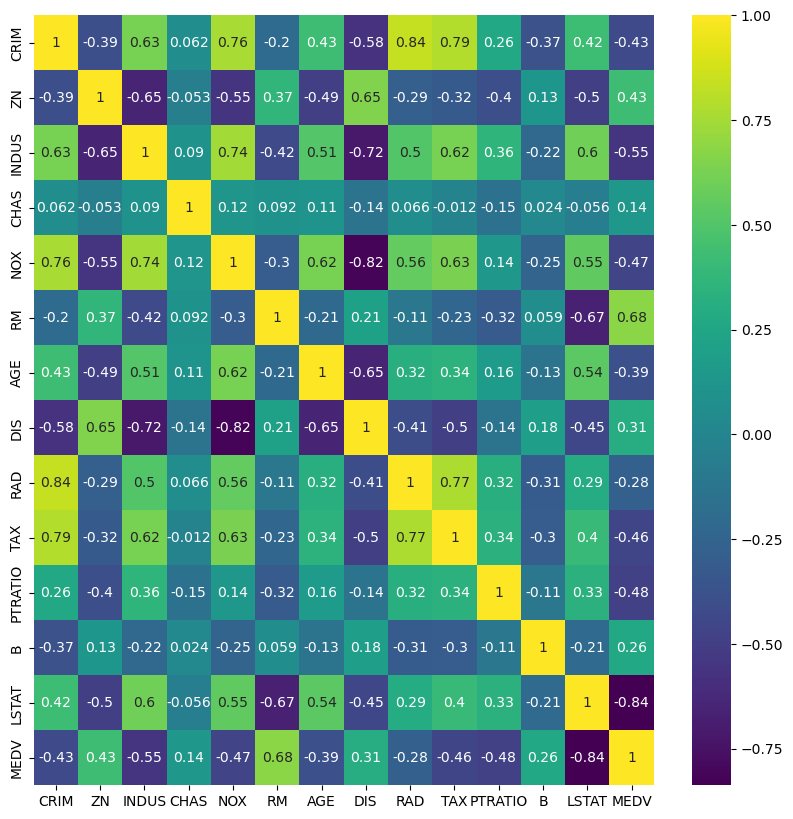

In [23]:
##FEATURE SELECTION
corr_ranking = (
trainSet
.drop(target, axis=1)
.corrwith(trainSet[target])
.abs()
.sort_values(ascending=False)
)

plt.figure(figsize=(10,10))
heatmap = sns.heatmap(trainSet.corr(), annot=True, cmap="viridis")

plt.savefig('foo.png')
plt.show()


In [24]:
corr_ranking

LSTAT      0.837102
RM         0.677344
INDUS      0.550270
PTRATIO    0.480167
NOX        0.469378
TAX        0.457351
ZN         0.426086
CRIM       0.425563
AGE        0.389051
DIS        0.311016
RAD        0.280226
B          0.264120
CHAS       0.141797
dtype: float64

In [25]:
cols = corr_ranking[corr_ranking>=threshold]
cols = cols.index.to_list()

#X = trainSet[cols]
#y = trainSet[target]

print(cols)

['LSTAT', 'RM', 'INDUS', 'PTRATIO', 'NOX', 'TAX', 'ZN', 'CRIM', 'AGE', 'DIS', 'RAD', 'B']


In [26]:
Y_train = trainSet.copy().pop(target)
X_train = trainSet[cols]#[cols]

Y_test = testSet.copy().pop(target)
X_test = testSet[cols]#[cols]

Y_val = valSet.copy().pop(target)
X_val = valSet[cols]#[cols]

In [27]:
linear_reg_params = {
'fit_intercept': [True, False],
}

In [28]:
b_models = []
model_results = []

params =  {'fit_intercept': True}
model = LinearRegression()
model.fit(X_train, Y_train)
b_models.append(model)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X_train)

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

mse_val = mean_squared_error(Y_val, y_pred_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(Y_val, y_pred_val)

print("VAL r^2 :", r2_val)

model_name = "Linear Regression Model"
results = pd.Series({'MSE': mse, 'RMSE': rmse, 'R2': r2}, name=model_name)
model_results.append(results)

print("Test r^2 :", r2)


VAL r^2 : 0.7591297315158995
Test r^2 : 0.6896122992229508


In [29]:
pd.concat(model_results, axis=1)

,Linear Regression Model
MSE,0.007863
RMSE,0.088672
R2,0.689612


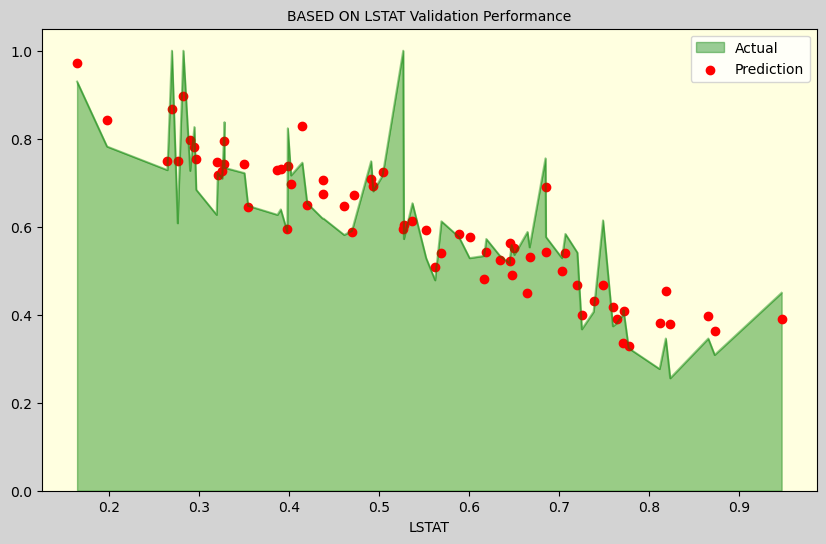

In [30]:
xgb_model = b_models[0]
col = 'LSTAT'
y_pred = xgb_model.predict(X_val.sort_values(by=col))
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('lightgray')

(
pd.concat([X_val[col], Y_val], axis=1)
.sort_values(by=col)
.plot.area(x=col, y='MEDV', color='green', alpha=0.4, label='Actual', ax=ax, stacked = False)
)

plt.scatter(X_val[col].sort_values(), y_pred, color='red', label='Prediction')
plt.legend()
plt.title("BASED ON LSTAT Validation Performance", size=10)
ax.set_facecolor('lightyellow')
plt.show()

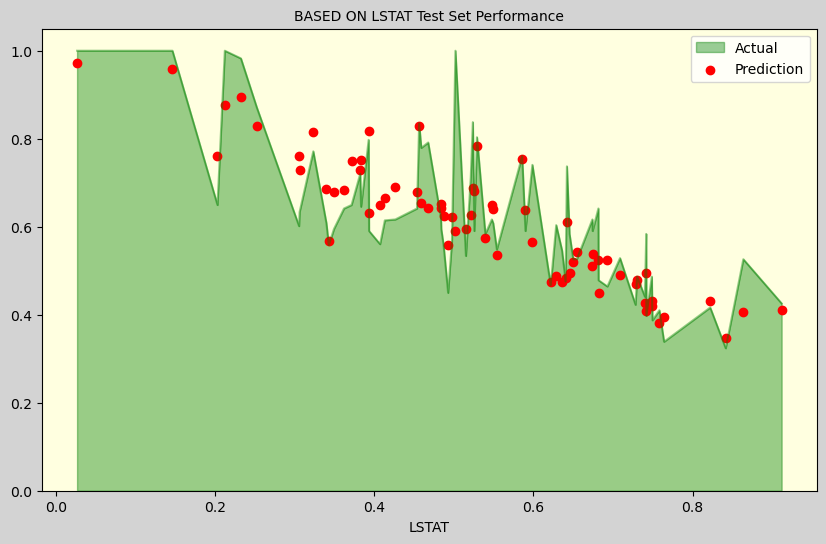

In [35]:
xgb_model = b_models[0]
col = 'LSTAT'
y_pred = xgb_model.predict(X_test.sort_values(by=col))
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('lightgray')

(
pd.concat([X_test[col], Y_test], axis=1)
.sort_values(by=col)
.plot.area(x=col, y='MEDV', color='green', alpha=0.4, label='Actual', ax=ax, stacked = False)
)

plt.scatter(X_test[col].sort_values(), y_pred, color='red', label='Prediction')
plt.legend()
plt.title("BASED ON LSTAT Test Set Performance", size=10)
ax.set_facecolor('lightyellow')
plt.show()

In [39]:
# Change the function from MinMaxScaler to StandardScaler to see how it impacts the results
# Change the random_state in splitting the data section to see the results on different folds
# Change the threshold to see its impact
# Remove the log transformation to see the change in results